In [1]:
import pandas as pd
import numpy as np

In [2]:
c = pd.read_csv("customer_join.csv")
ul = pd.read_csv("use_log.csv")

In [3]:
ul.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [4]:
c.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
amax                0
amin                0
flag1               0
cal_date            0
mem_period          0
dtype: int64

#### 클러스터 사용 K-Means
 - 군집개수 4개
 - mean, median, min, max 변수는 월 이용 회수와 관련된 변수 1~8값을 가짐
 - mem_period 단위 너무 크니 scaling

In [5]:
cc = c[["mean", "median", "amax", "amin", "mem_period"]]
cc.head()

,mean,median,amax,amin,mem_period
0,4.833333,5.0,8,2,47.968131
1,5.083333,5.0,7,3,47.968131
2,4.583333,5.0,6,3,47.968131
3,4.833333,4.5,7,2,47.968131
4,3.916667,4.0,6,1,47.968131


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cc)
x_scaled = pd.DataFrame(x_scaled, columns=["mean", "median", "amax", "amin", "mem_period"])
x_scaled.head()

,mean,median,amax,amin,mem_period
0,-0.281206,-0.133676,0.081177,-0.533620,2.031859
1,-0.140545,-0.133676,-0.379928,-0.021149,2.031859
2,-0.421867,-0.133676,-0.841034,-0.021149,2.031859
3,-0.281206,-0.400393,-0.379928,-0.533620,2.031859
4,-0.796964,-0.667109,-0.841034,-1.046090,2.031859


In [8]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(x_scaled)

In [9]:
cc["cluster"] = clusters.labels_
cc.head()

C:\Users\user\AppData\Local\Temp\ipykernel_9020\3599466053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc["cluster"] = clusters.labels_


,mean,median,amax,amin,mem_period,cluster
0,4.833333,5.0,8,2,47.968131,1
1,5.083333,5.0,7,3,47.968131,1
2,4.583333,5.0,6,3,47.968131,1
3,4.833333,4.5,7,2,47.968131,1
4,3.916667,4.0,6,1,47.968131,1


In [10]:
cc.rename(columns={"mean" : "월 평균", "median" : "월별 중간값",
                   "amax" : "월 최대값", "amin" : "월 최소값",
                   "mem_period" : "회원기간"}, inplace=True)
cc.head()

C:\Users\user\AppData\Local\Temp\ipykernel_9020\382428698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc.rename(columns={"mean" : "월 평균", "median" : "월별 중간값",


,월 평균,월별 중간값,월 최대값,월 최소값,회원기간,cluster
0,4.833333,5.0,8,2,47.968131,1
1,5.083333,5.0,7,3,47.968131,1
2,4.583333,5.0,6,3,47.968131,1
3,4.833333,4.5,7,2,47.968131,1
4,3.916667,4.0,6,1,47.968131,1


In [11]:
cc.groupby("cluster").count()

,월 평균,월별 중간값,월 최대값,월 최소값,회원기간
cluster,,,,,
0,846,846,846,846,846
1,1251,1251,1251,1251,1251
2,759,759,759,759,759
3,1336,1336,1336,1336,1336


In [12]:
cc.groupby("cluster").mean()

,월 평균,월별 중간값,월 최대값,월 최소값,회원기간
cluster,,,,,
0,8.054608,8.039598,10.009456,6.160757,7.809637
1,4.676091,4.670264,7.231815,2.153477,37.819727
2,3.049270,2.882740,4.745718,1.652174,10.147960
3,5.522518,5.373129,8.743263,2.686377,15.688428


 - 그룹0 : 평균 회원기간이 7일로 가장 짧고 월평균 회수가 8회로 가장 높음
 - 그룹1,3 : 평균 회원기간이 다른구룹보다는 긺. 그룹 1은 그룹3 보다 회원유지 기간은 길지만 월평균 이용회수는 적음
 - 그룹2 : 평균 회원유지기간이 다른 그룹보다 짧음 평균 이용회수도 3회로 가장 낮음

 그룹별 특징을 정의해서 프로모션할 때 사용 가능할수 있다.

#### 차원축소


In [13]:
from sklearn.decomposition import PCA

In [14]:
x = x_scaled.copy()

In [15]:
pca = PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [16]:
x_pca = pca.transform(x)

In [17]:
x_pca

array([[-0.82348238, -1.95542865],
       [-0.71143886, -1.79654608],
       [-1.06487338, -1.65597187],
       ...,
       [ 3.03270969,  1.14925646],
       [ 6.08668346,  0.58828694],
       [ 5.06914574,  0.77750796]])

In [18]:
pca_x = pd.DataFrame(x_pca)
pca_x["cluster"] = cc["cluster"]
pca_x

,0,1,cluster
0,-0.823482,-1.955429,1
1,-0.711439,-1.796546,1
2,-1.064873,-1.655972,1
3,-1.164117,-1.805864,1
4,-2.020158,-1.664221,1
...,...,...,...
4187,3.032710,1.149256,0
4188,5.068692,0.775277,0
4189,3.032710,1.149256,0
4190,6.086683,0.588287,0


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

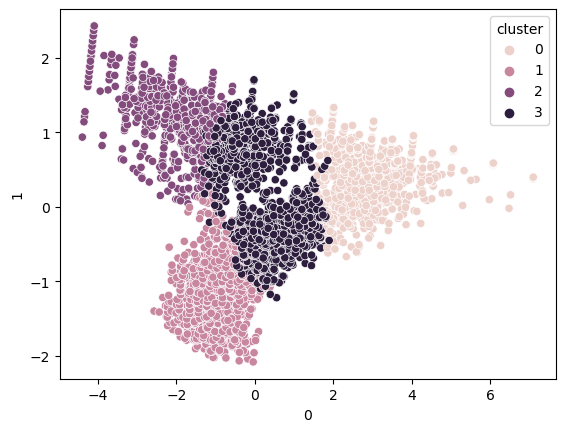

In [20]:
axs = plt.subplots()
axs = sns.scatterplot(data=pca_x,x=0,y=1,hue="cluster")

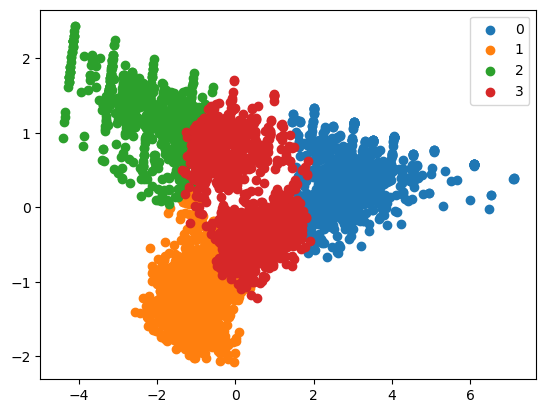

In [21]:
for i in sorted(pca_x["cluster"].unique()):
    tmp = pca_x.loc[pca_x["cluster"]==i]
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_x["cluster"].unique()))

#### 탈퇴 비율 확인

In [22]:
cc_join = pd.concat([cc,c], axis=1)

In [23]:
newdf = cc_join.groupby(["cluster", "is_deleted"],
                        as_index=False).count()[["cluster", "is_deleted", "customer_id"]]
newdf.head()

,cluster,is_deleted,customer_id
0,0,0,827
1,0,1,19
2,1,0,1230
3,1,1,21
4,2,1,759


In [24]:
len(cc_join[cc_join["cluster"] == 2])

759

In [25]:
d0 = (newdf["is_deleted"] == 0) # 지속 회원
d1 = (newdf["is_deleted"] == 1) # 탈퇴 회원

In [26]:
for i in range(0,4):
    tmp = (newdf["cluster"]==i)
    print("cluster" + str(i) + "의 탈퇴회원 비율은 " + 
        str(round(newdf.loc[(tmp&d1), "customer_id"].sum()* 100
        / newdf.loc[tmp, "customer_id"].sum(), 2)) + "%")
    print("cluster" + str(i) + "의 유지회원 비율은 " + 
        str(round(newdf.loc[(tmp&d0), "customer_id"].sum()* 100
        / newdf.loc[tmp, "customer_id"].sum(), 2)) + "%")

cluster0의 탈퇴회원 비율은 2.25%
cluster0의 유지회원 비율은 97.75%
cluster1의 탈퇴회원 비율은 1.68%
cluster1의 유지회원 비율은 98.32%
cluster2의 탈퇴회원 비율은 100.0%
cluster2의 유지회원 비율은 0.0%
cluster3의 탈퇴회원 비율은 41.24%
cluster3의 유지회원 비율은 58.76%


- 클러스터 0,1: 유지회원 >탈퇴 회원
- 클러스터 2 : 모두 탈퇴
- 클러스터 3 : 유지회원과 탈퇴회원 비슷
#
- 클러스터0 : 회원기간 짧음, 월평균 이용 회수 높음
- 클러스터2 : 회원기간 짧음, 월평균 이용 회수 낮음
- 클러스터1,3 : 평균 회원 유지기간이 클러스터 0,2보다는 김
- 클러스터 1은 클러스터 3보다 회원기간이 길지만 이용회수는 적은편

#### 정리
- 클러스터 0 : 초반에 열심히 이용(이용회수 많고 유지회원 많음 그러나 평균 회원기간이 짧아서 처음에만 열심히 이용)
- 클러스터 1 : 안정적인 그룹 (회원유지기간이 길고, 이용회수는 적음, 유지회원은 많음)
- 클러스터 2 : 탈퇴자 그룹 (짧게 이용후 탈퇴)
- 클러스터 3 : 회원유지기간이 길고, 탈퇴회원과 지속회원이 비슷한 그룹

#### 정기이용 여부 확인

In [27]:
newdf2 = cc_join.groupby(["cluster", "flag1"],
                         as_index=False).count()[["cluster","flag1","customer_id"]]
newdf2

,cluster,flag1,customer_id
0,0,0,52
1,0,1,794
2,1,0,2
3,1,1,1249
4,2,0,496
5,2,1,263
6,3,0,229
7,3,1,1107


In [28]:
flag0 = (newdf2["flag1"] == 0) # 비정기 사용 회원
flag1 = (newdf2["flag1"] == 1) # 주기적 사용 회원

In [37]:
for i in range(0,4):
    tmp = (newdf2["cluster"]==i)
    print("cluster" + str(i) + "의 정기회원 비율은 " + 
          str(round(newdf2.loc[(tmp&flag1), "customer_id"].sum()* 100
          / newdf2.loc[tmp, "customer_id"].sum(), 2)) + "%")
    print("cluster" + str(i) + "의 비정기회원 비율은 " + 
          str(round(newdf2.loc[(tmp&flag0), "customer_id"].sum()* 100
          / newdf2.loc[tmp, "customer_id"].sum(), 2)) + "%")

cluster0의 정기회원 비율은 93.85%
cluster0의 비정기회원 비율은 6.15%
cluster1의 정기회원 비율은 99.84%
cluster1의 비정기회원 비율은 0.16%
cluster2의 정기회원 비율은 34.65%
cluster2의 비정기회원 비율은 65.35%
cluster3의 정기회원 비율은 82.86%
cluster3의 비정기회원 비율은 17.14%


- 클러스터 0 : 초반에 불타오르는 그룹 (정기 94%, 비정기 6%)
- 클러스터 1 : 안정적인 그룹 (정기99%, 비정기 0.1%)
- 클러스터 2 : 가장 이용이 적은 그룹 (정기 35%, 비정기 65%)
- 클러스터 3 : 유지, 탈퇴 비율이 비슷한 그룹 (정기 83%, 비정기 17%)